<a href="https://colab.research.google.com/github/nikaslukyanov/AI4ALL/blob/main/Types_of_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring Types of Data Visualizations
We will be visualizing the data downloaded from the [Kaggle Data Download Demo](https://colab.research.google.com/drive/1OOe1CvUg5kiyaG9lU83BNtd8_tSIvekM?authuser=2#scrollTo=CXDiZWQPqffx). We will explore when to use a certain type of graphic and how to incorporate these visualizations to make meaningful insights.

## Setting up Google Drive and Loading Dataset

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import os
# Navigate into Drive where you want to store your Kaggle data
os.chdir('../gdrive/MyDrive/Kaggle')

# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

['ds_salaries.csv',
 'data-science-salaries-2023.zip',
 'kaggle.json',
 'Basic.png']

In [ ]:
import pandas as pd
df = pd.read_csv("ds_salaries.csv")
us_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
    'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
    'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def us_based(state):
  if state in us_state_codes:
    return("US")
  else:
    return(state)

df['company_country'] = [us_based(x) for x in df['company_location']]
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_country
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,ES
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,US
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,US
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,US
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,US


## Types of Data and How to Visualize


In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
company_country       object
dtype: object

In [ ]:
# Set random seed for reproducability
import random
random.seed(1)

# Determine the minimum number of entries in any of the remote_ratio groups
min_group_size = 50

# Sample the minimum number of entries from each remote_ratio group
df_sampled = df.groupby('remote_ratio').apply(lambda x: x.sample(min_group_size)).reset_index(drop=True)
df_sampled.groupby("remote_ratio").size()

remote_ratio
0      50
50     50
100    50
dtype: int64

In [ ]:
df_sampled.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_country,color,size,shape
0,2023,SE,FT,Data Engineer,160000,USD,160000,US,0,US,M,US,purple,40,o
1,2022,MI,FT,Data Scientist,120000,AUD,83171,AU,0,AU,L,AU,red,80,o
2,2023,MI,FT,Data Scientist,45000,GBP,54685,GB,0,GB,M,GB,red,40,o
3,2021,EN,FT,Research Scientist,100000,USD,100000,JE,0,CN,L,CN,blue,80,o
4,2023,EN,FT,Data Analyst,100000,USD,100000,US,0,US,M,US,blue,40,o


#### Scatterplot
A continuous by continuous graphic comparing 2 or more variables. A user can change the color shape, and size of the data points.

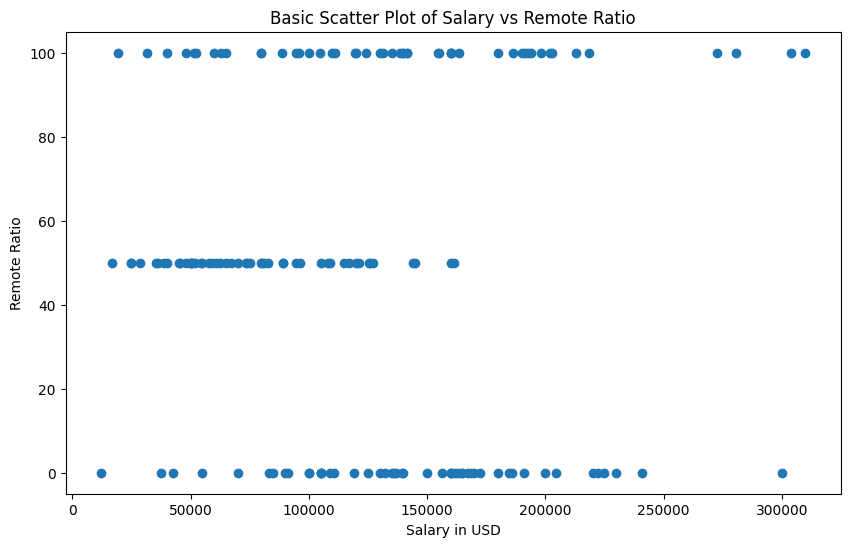

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Build simple scatterplot
ax.scatter(df_sampled['salary_in_usd'],df_sampled['remote_ratio'])

# Set labels and title
ax.set_xlabel('Salary in USD ($)')
ax.set_ylabel('Remote Ratio')
ax.set_title('Basic Scatter Plot of Salary ($) vs Remote Ratio')

#plt.savefig("Basic.png", dpi=300)

Expand the inference power of a scatterplot by changing the size, shape, and color of points to highlight different features in the data

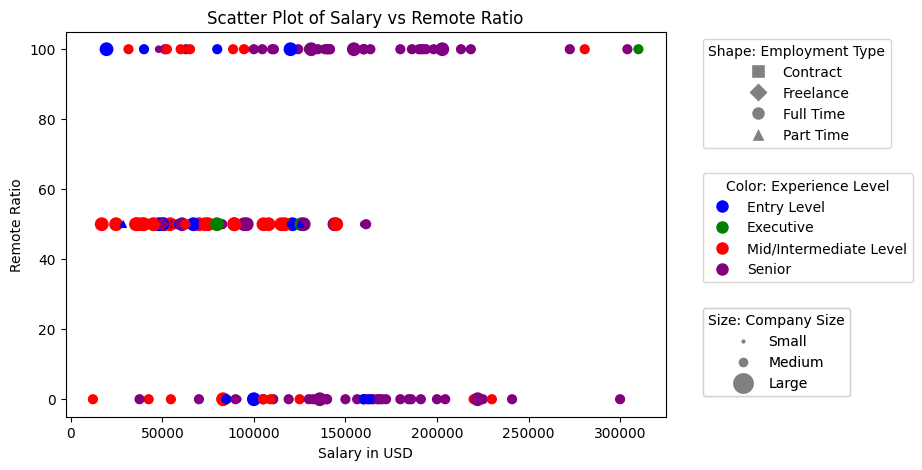

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

for shape in df_sampled['shape'].unique():
    subset = df_sampled[df_sampled['shape'] == shape]
    ax.scatter(
        subset['salary_in_usd'],
        subset['remote_ratio'],
        s=subset['size'],
        c=subset['color'],
        marker=shape,
        label=shape
    )

# Set labels and title
ax.set_xlabel('Salary in USD ($)')
ax.set_ylabel('Remote Ratio')
ax.set_title('Scatter Plot of Salary ($) vs Remote Ratio')

# Add legends for shapes, colors, and sizes
shape_handles = [plt.Line2D([0], [0], marker=shape, color='w', label=etype,
                            markersize=10, markerfacecolor='grey') for etype, shape in shape_mapping.items()]

color_handles = [plt.Line2D([0], [0], marker='o', color='w', label=exp,
                            markersize=10, markerfacecolor=color) for exp, color in color_mapping.items()]

size_handles = [plt.Line2D([0], [0], marker='o', color='w', label=size,
                           markersize=size_mapping[size]//5, markerfacecolor='grey') for size in size_mapping.keys()]

# Combine legends
handles = shape_handles + color_handles + size_handles
labels = list(shape_mapping.keys()) + [""] * 2 + list(color_mapping.keys()) + [""] * 2 + list(size_mapping.keys())


# Create the combined legends
legend1 = ax.legend(handles=shape_handles, labels=['Contract', "Freelance", 'Full Time','Part Time'], title='Shape: Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
legend2 = ax.legend(handles=color_handles, labels=["Entry Level", "Executive", "Mid/Intermediate Level", "Senior"], title='Color: Experience Level', bbox_to_anchor=(1.05, 0.65), loc='upper left')
legend3 = ax.legend(handles=size_handles, labels=["Small", "Medium", "Large"], title='Size: Company Size', bbox_to_anchor=(1.05, 0.3), loc='upper left')

# Add legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)
ax.add_artist(legend3)

# Adjust the figure size to add space to the right
fig.set_size_inches(10, 5)

# Adjust subplot parameters to add white space to the right
plt.subplots_adjust(left=-0.2,right=0.4)


#plt.savefig("Enhanced.png", dpi=300, bbox_inches='tight')


#### Boxplot and Barchart

Text(0.5, 0, 'Salary in USD ($)')

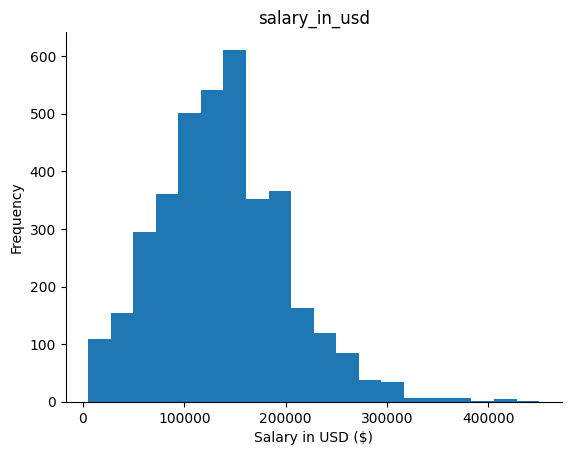

In [ ]:
df['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Salary in USD ($)")

Text(0, 0.5, '')

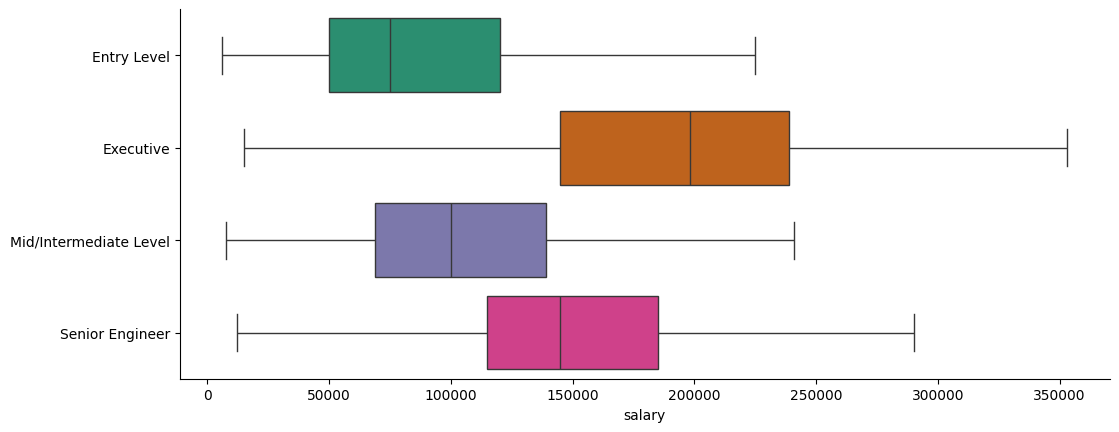

In [ ]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
df_cleaned = df.groupby('experience_level').apply(lambda x: remove_outliers(x, 'salary')).reset_index(drop=True)

# Plot
figsize = (12, 1.2 * len(df_cleaned['experience_level'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(data=df_cleaned, x='salary', y='experience_level',  hue='experience_level', palette='Dark2', legend=False, showfliers=False)
sns.despine(top=True, right=True, bottom=False, left=False)

# Dictionary to Create Custom labels for y-axis
custom_labels = {"EN": "Entry Level", "EX": "Executive", "MI": "Mid/Intermediate Level", "SE": "Senior Engineer"}
# Set custom y tick labels
plt.yticks(ticks=range(len(custom_labels)), labels=[custom_labels[label] for label in df_cleaned['experience_level'].unique()])
plt.ylabel("")

#### Pie Chart

Text(0.5, 1.0, 'Percentage of Experience Levels')

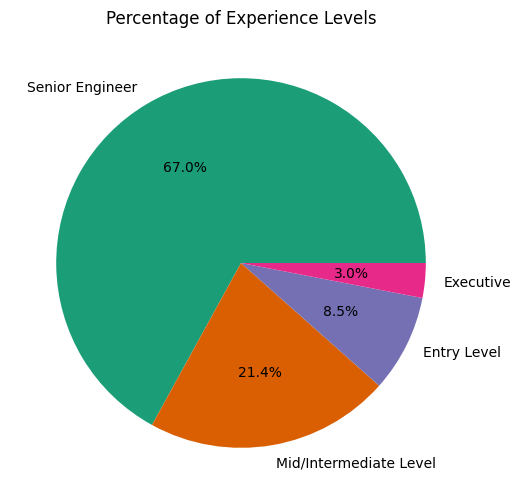

In [ ]:
# Custom labels for experience levels
custom_labels = {"EN": "Entry Level", "EX": "Executive", "MI": "Mid/Intermediate Level", "SE": "Senior Engineer"}

# Count the number of occurrences of each experience level
experience_counts = df['experience_level'].value_counts()

# Map the custom labels
experience_counts.index = experience_counts.index.map(custom_labels)

# Plot
plt.figure(figsize=(10, 6))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'))
plt.title('Percentage of Experience Levels')

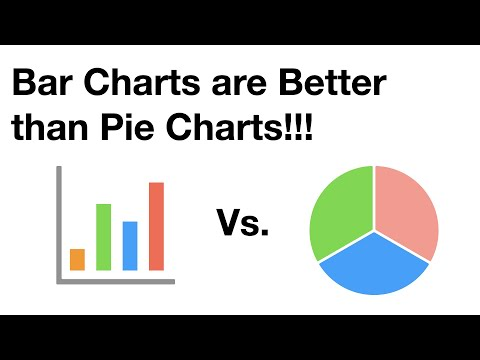

In [ ]:
from IPython.display import YouTubeVideo
video_id = 'RiEZ_hEf96A'
YouTubeVideo(video_id, width=800, height=450)

In [ ]:
## End of Script